In [ ]:
## Importing all required libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("WMT.csv", parse_dates=['Date'], index_col=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12566 entries, 1972-08-25 to 2022-06-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       12566 non-null  float64
 1   High       12566 non-null  float64
 2   Low        12566 non-null  float64
 3   Close      12566 non-null  float64
 4   Adj Close  12566 non-null  float64
 5   Volume     12566 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 687.2 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036175,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036038,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035627,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035627,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035079,870400


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-17,120.019997,120.879997,117.970001,118.290001,118.290001,12166700
2022-06-21,118.300003,122.779999,118.220001,122.169998,122.169998,7972200
2022-06-22,122.099998,123.250000,120.589996,120.690002,120.690002,6745000
2022-06-23,121.750000,123.959999,121.199997,123.620003,123.620003,6013600
2022-06-24,124.089996,125.309998,123.160004,123.720001,123.720001,10611500


In [ ]:
start_date = "2020-01-01"
end_date = "2022-06-24"
num_rows = df.loc[start_date:end_date].count()

In [ ]:
num_rows

Open         625
High         625
Low          625
Close        625
Adj Close    625
Volume       625
dtype: int64

In [ ]:
df_close = df['Close']

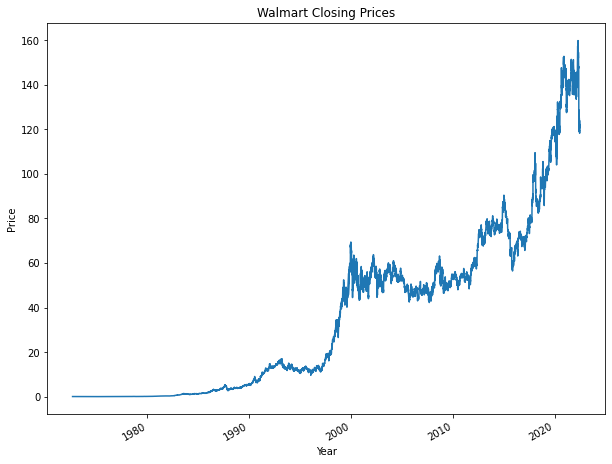

In [ ]:
plt.figure(figsize=(10,8))
df_close.plot()
plt.title("Walmart Closing Prices")
plt.xlabel("Year")
plt.ylabel('Price')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
res = adfuller(df_close, autolag = 'AIC')
print("P-Value :", res[1])

P-Value : 0.9872411977692095


In [ ]:
kpss_res = kpss(df_close)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
kpss_res[1]

0.01

In [ ]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d,q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p,d,q))]

In [ ]:
## We will be building all these models
for i in range(len(pdq)):
    print('SARIMAX: {} x {}'.format(pdq[i], seasonal_pdq[i]))

SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
aic_scores = {}
i = 1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_close, order = param, seasonal_order = param_seasonal,
                                           enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('{}: ARIMA{}x{} - AIC:{}'.format(i,param,param_seasonal,results.aic))
            aic_scores[i] = results.aic
            i += 1
        except:
            continue

1: ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:135155.39387224521
2: ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:118466.44157261355
3: ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:57322.143375555854
4: ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:57268.105461117884
5: ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:57313.41670750581
6: ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:57295.69637181258
7: ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:57273.87064985442
8: ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:57156.89409326557
9: ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:118001.56092387572
10: ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:101673.84382051506
11: ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:46975.23477665463
12: ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:46565.56562023277
13: ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:57454.53702294229
14: ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:46580.36252427772
15: ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:46645.58940578022
16: ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:46421.22290155345
17: ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:28978.416780158914
18: ARIMA(0, 1, 0)x(0, 0, 1, 12) 

In [ ]:
min(aic_scores, key = aic_scores.get)

58

In [ ]:
final_model = sm.tsa.statespace.SARIMAX(df_close, order = (1,1,1), seasonal_order = (0,0,1,12),
                                           enforce_stationarity = False, enforce_invertibility = False)

In [ ]:
final_results = final_model.fit()

In [ ]:
final_results.aic

28919.232404617796

In [ ]:
## Set forecasts to start at 2020-01-01 to end of the data to forecast
pred = final_results.get_prediction(start = pd.to_datetime('2020-01-02'), dynamic = False)

In [ ]:
## printing the predicted values
pred.predicted_mean

Date
2020-01-02    118.883056
2020-01-03    118.967869
2020-01-06    117.964215
2020-01-07    117.669912
2020-01-08    116.649454
                 ...    
2022-06-17    120.592293
2022-06-21    118.465329
2022-06-22    122.087749
2022-06-23    120.705491
2022-06-24    123.494990
Name: predicted_mean, Length: 625, dtype: float64

In [ ]:
y_actual = df_close['2020-01-02':]

In [ ]:
y_predicted = pred.predicted_mean.values

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
sqrt(mean_squared_error(y_predicted, y_actual))

2.092236321609997

## Taking data from start of 2021

In [ ]:
testclose = df_close.iloc[-625:]
trainclose = df_close.iloc[:-625] 
print(f"Train Shape: {trainclose.shape}; Test Shape: {testclose.shape}")

Train Shape: (11941,); Test Shape: (625,)


In [ ]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [ ]:
def timeseries_evaluation_metrics(y_true, y_pred):
    print('Evaluation metric results: ')
    print(f'MSE value : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE value : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE value : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE value : {MAPE(y_true, y_pred)}')
    print(f'R2 score : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
testclose

Date
2020-01-02    118.940002
2020-01-03    117.889999
2020-01-06    117.650002
2020-01-07    116.559998
2020-01-08    116.160004
                 ...    
2022-06-17    118.290001
2022-06-21    122.169998
2022-06-22    120.690002
2022-06-23    123.620003
2022-06-24    123.720001
Name: Close, Length: 625, dtype: float64

In [ ]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    fit_v = SimpleExpSmoothing(np.asarray(trainclose)).fit(i)
    fcst_pred_v= fit_v.forecast(len(testclose))   
    rmse = np.sqrt(metrics.mean_squared_error(testclose, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']) 

,smoothing parameter,RMSE
1,0.1,20.318278
2,0.2,20.368858
3,0.3,20.474426
4,0.4,20.564413
5,0.5,20.635544
6,0.6,20.696318
7,0.7,20.752544
8,0.8,20.806345
9,0.9,20.857865
10,1.0,20.906653


In [ ]:
SES = SimpleExpSmoothing(np.asarray(trainclose))
fit_SES = SES.fit(smoothing_level = 1, optimized=False)
fcst_gs_pred = fit_SES.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred)

Evaluation metric results: 
MSE value : 437.08813015446367
MAE value : 18.3791073712
RMSE value : 20.906652772609576
MAPE value : 12.952619470451765
R2 score : -2.4784075422036587



In [ ]:
fit_SES.summary()

Dep. Variable:,endog,No. Observations:,11941
Model:,SimpleExpSmoothing,SSE,4645.268
Optimized:,False,AIC,-11269.842
Trend:,None,BIC,-11255.066
Seasonal:,None,AICC,-11269.838
Seasonal Periods:,None,Date:,"Mon, 16 Jan 2023"
Box-Cox:,False,Time:,11:44:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,0.0644530,l.0,False


In [ ]:
SES = SimpleExpSmoothing(np.asarray(trainclose))
fit_SES_auto = SES.fit(optimized= True, use_brute = True)
fcst_auto_pred = fit_SES_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred) 

Evaluation metric results: 
MSE value : 436.3234122378297
MAE value : 18.361798130743033
RMSE value : 20.888355900784287
MAPE value : 12.940417245064308
R2 score : -2.472321811694487



In [ ]:
fit_SES_auto.summary()

Dep. Variable:,endog,No. Observations:,11941
Model:,SimpleExpSmoothing,SSE,4639.196
Optimized:,True,AIC,-11285.460
Trend:,None,BIC,-11270.684
Seasonal:,None,AICC,-11285.457
Seasonal Periods:,None,Date:,"Mon, 16 Jan 2023"
Box-Cox:,False,Time:,11:44:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9617749,alpha,True
initial_level,0.0644510,l.0,True


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred

,Close_grid_Search
0,118.839996
1,118.839996
2,118.839996
3,118.839996
4,118.839996
...,...
620,118.839996
621,118.839996
622,118.839996
623,118.839996


In [ ]:
df_fcst_gs_pred["new_index"] = testclose.index
df_fcst_gs_pred

,Close_grid_Search,new_index
0,118.839996,2020-01-02
1,118.839996,2020-01-03
2,118.839996,2020-01-06
3,118.839996,2020-01-07
4,118.839996,2020-01-08
...,...,...
620,118.839996,2022-06-17
621,118.839996,2022-06-21
622,118.839996,2022-06-22
623,118.839996,2022-06-23


In [ ]:
##For grid search model-

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = testclose.index
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index") 

In [ ]:
df_fcst_gs_pred.head()

,Close_grid_Search
new_index,
2020-01-02,118.839996
2020-01-03,118.839996
2020-01-06,118.839996
2020-01-07,118.839996
2020-01-08,118.839996


In [ ]:
#For automatic model-

df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = testclose.index
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index") 
df_fcst_auto_pred

,Close_auto_search
new_index,
2020-01-02,118.861676
2020-01-03,118.861676
2020-01-06,118.861676
2020-01-07,118.861676
2020-01-08,118.861676
...,...
2022-06-17,118.861676
2022-06-21,118.861676
2022-06-22,118.861676


In [ ]:
df_fcst_simp_exp_smooth = df_fcst_gs_pred.copy(deep=True)
df_fcst_simp_exp_smooth

,Close_grid_Search
new_index,
2020-01-02,118.839996
2020-01-03,118.839996
2020-01-06,118.839996
2020-01-07,118.839996
2020-01-08,118.839996
...,...
2022-06-17,118.839996
2022-06-21,118.839996
2022-06-22,118.839996


In [ ]:
df_fcst_simp_exp_smooth['Close_auto_pred'] = fcst_auto_pred
df_fcst_simp_exp_smooth

,Close_grid_Search,Close_auto_pred
new_index,,
2020-01-02,118.839996,118.861676
2020-01-03,118.839996,118.861676
2020-01-06,118.839996,118.861676
2020-01-07,118.839996,118.861676
2020-01-08,118.839996,118.861676
...,...,...
2022-06-17,118.839996,118.861676
2022-06-21,118.839996,118.861676
2022-06-22,118.839996,118.861676


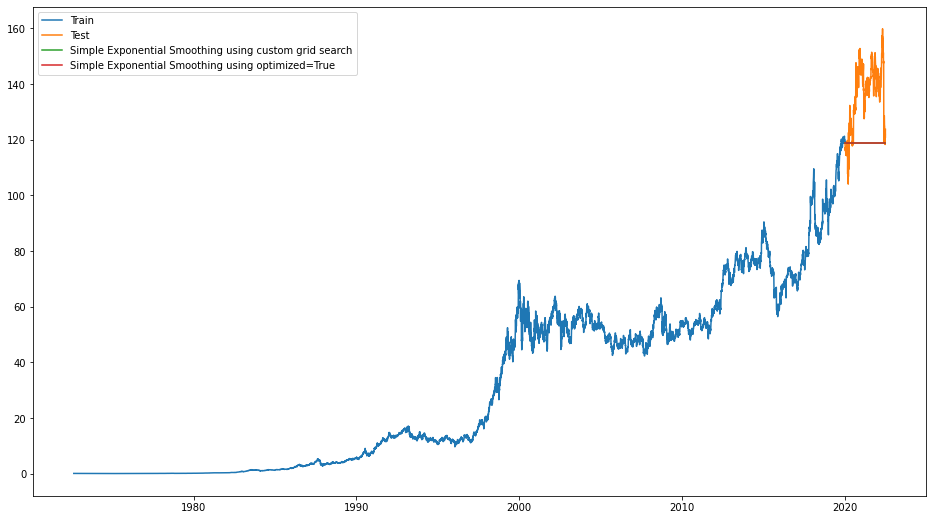

In [ ]:
#Making the trend plot for entire series.

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose, label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show() 

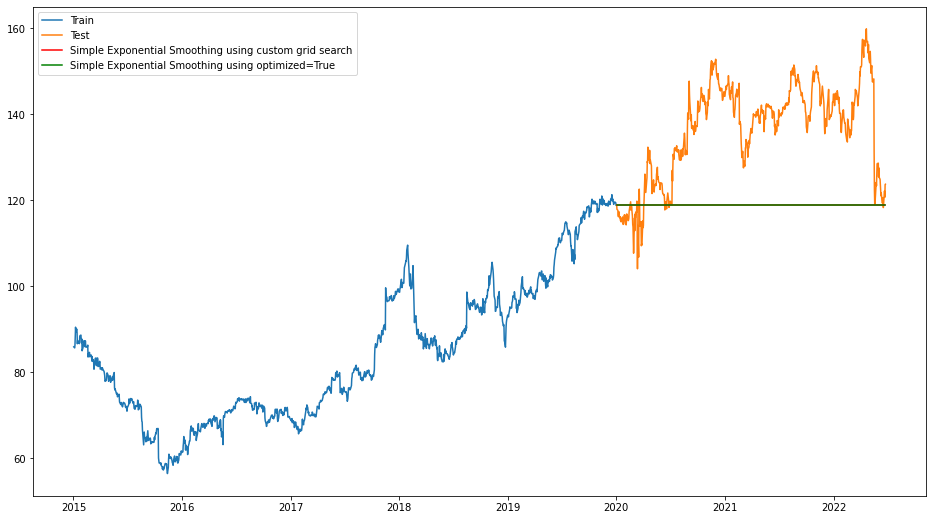

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose["2015-01":], label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search', color='red')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True', color='green')
plt.legend(loc='best')
plt.show() 

In [ ]:
np.array(range(1, 10))/10.0

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
param_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid_DES = {'smoothing_level': param_values,
                  'smoothing_slope':param_values,
                  'damping_slope': param_values,
                  'damped': [True, False]}
pg_DES = list(ParameterGrid(param_grid_DES))

In [ ]:
for a, b in enumerate(pg_DES):
    print(f'A: {a}, B:{b}')


A: 0, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.1}
A: 1, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.2}
A: 2, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.3}
A: 3, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.4}
A: 4, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.5}
A: 5, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.6}
A: 6, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.7}
A: 7, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.8}
A: 8, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.1, 'smoothing_slope': 0.9}
A: 9, B:{'damped': True, 'damping_slope': 0.1, 'smoothing_level': 0.2, 'smoothing_slope': 0.1}
A: 10, B:{'damped': True, 'damping_slope': 0.1, 's

In [ ]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])
for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    fit_Holt = Holt(trainclose, damped=damped).fit(smoothing_level=smoothing_level, 
                                                   smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_DES = df_results_DES.append({'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope, 
                                            'damping_slope':damping_slope, 'damped':damped, 'RMSE':RMSE, 'R²':r2}, ignore_index=True)
df_results_DES.sort_values(by=['RMSE','R²']).head(10) 

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,R²
729,0.1,0.1,0.1,False,15.925945,-1.018468
810,0.1,0.1,0.2,False,15.925945,-1.018468
891,0.1,0.1,0.3,False,15.925945,-1.018468
972,0.1,0.1,0.4,False,15.925945,-1.018468
1053,0.1,0.1,0.5,False,15.925945,-1.018468
1134,0.1,0.1,0.6,False,15.925945,-1.018468
1215,0.1,0.1,0.7,False,15.925945,-1.018468
1296,0.1,0.1,0.8,False,15.925945,-1.018468
1377,0.1,0.1,0.9,False,15.925945,-1.018468
648,0.1,0.1,0.9,True,20.257439,-2.265732


In [ ]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])
for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    local_dict = b
    fit_Holt = Holt(trainclose, damped=damped).fit(smoothing_level=smoothing_level, 
                                                   smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    local_dict['RMSE'] = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    local_dict['r2'] = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_DES = df_results_DES.append(local_dict, ignore_index=True)
df_results_DES.sort_values(by=['RMSE','R²']).head(10) 

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,R²,r2
729,0.1,0.1,0.1,False,15.925945,NaN,-1.018468
810,0.1,0.1,0.2,False,15.925945,NaN,-1.018468
891,0.1,0.1,0.3,False,15.925945,NaN,-1.018468
972,0.1,0.1,0.4,False,15.925945,NaN,-1.018468
1053,0.1,0.1,0.5,False,15.925945,NaN,-1.018468
1134,0.1,0.1,0.6,False,15.925945,NaN,-1.018468
1215,0.1,0.1,0.7,False,15.925945,NaN,-1.018468
1296,0.1,0.1,0.8,False,15.925945,NaN,-1.018468
1377,0.1,0.1,0.9,False,15.925945,NaN,-1.018468
648,0.1,0.1,0.9,True,20.257439,NaN,-2.265732


In [ ]:
## Selecting the best parameter
best_params = df_results_DES.iloc[df_results_DES.sort_values(by=['RMSE','R²']).head(1).index, :4]
best_params

,smoothing_level,smoothing_slope,damping_slope,damped
729,0.1,0.1,0.1,False


In [ ]:
best_params['damped']

729    False
Name: damped, dtype: object

In [ ]:
## Building the model with best parameters
DES = Holt(trainclose,damped=best_params['damped'])
fit_Holt = DES.fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'], 
                    damping_slope=best_params['damping_slope'] ,optimized=False)
fcst_gs_pred_Holt = fit_Holt.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred_Holt)

Evaluation metric results: 
MSE value : 253.6357105629978
MAE value : 13.9740173114245
RMSE value : 15.925944573650813
MAPE value : 9.880362990304382
R2 score : -1.0184679192334412



In [ ]:
df_fcst_gs_holt = pd.DataFrame(fcst_gs_pred_Holt, columns=['Close_GS_Holt'])
df_fcst_gs_holt["new_index"] = testclose.index
df_fcst_gs_holt = df_fcst_gs_holt.set_index("new_index") 
df_fcst_gs_holt.head()

,Close_GS_Holt
new_index,
2020-01-02,119.706764
2020-01-03,119.720685
2020-01-06,119.734606
2020-01-07,119.748527
2020-01-08,119.762448


In [ ]:
## Automatic Model
DES = Holt(trainclose)
fit_Holt_auto = DES.fit(optimized= True, use_brute = True)
fcst_auto_pred_Holt = fit_Holt_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred_Holt)

Evaluation metric results: 
MSE value : 315.83818420915713
MAE value : 15.555109215375333
RMSE value : 17.771836827102515
MAPE value : 10.969009572024666
R2 score : -1.513483771981634



In [ ]:
fcst_auto_future_pred = fit_Holt.forecast(30)

In [ ]:
fcst_auto_future_pred.head()

11941    119.706764
11942    119.720685
11943    119.734606
11944    119.748527
11945    119.762448
dtype: float64

In [ ]:
fit_Holt_auto.summary()

Dep. Variable:,Close,No. Observations:,11941
Model:,Holt,SSE,4637.918
Optimized:,True,AIC,-11284.750
Trend:,Additive,BIC,-11255.199
Seasonal:,None,AICC,-11284.743
Seasonal Periods:,None,Date:,"Mon, 16 Jan 2023"
Box-Cox:,False,Time:,12:14:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9614545,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
df_fcst_auto_holt = pd.DataFrame(fcst_auto_pred_Holt, columns=['Close_Auto_Holt'])
df_fcst_auto_holt["new_index"] = testclose.index
df_fcst_auto_holt = df_fcst_auto_holt.set_index("new_index") 
df_fcst_auto_holt.head()

,Close_Auto_Holt
new_index,
2020-01-02,118.872209
2020-01-03,118.882160
2020-01-06,118.892111
2020-01-07,118.902061
2020-01-08,118.912012


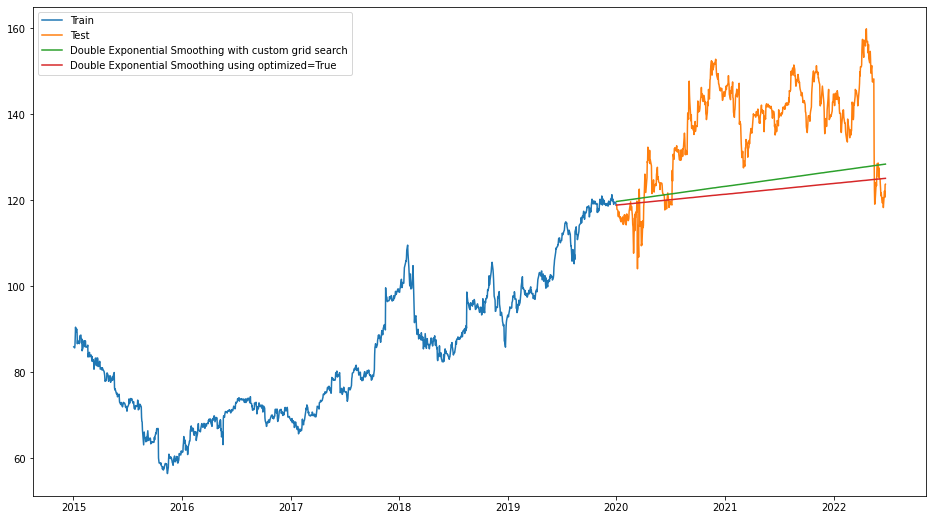

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose["2015-01":,], label='Train')
plt.plot(testclose, label='Test')
plt.plot(df_fcst_gs_holt, label='Double Exponential Smoothing with custom grid search')
plt.plot(df_fcst_auto_holt, label='Double Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show() 

In [ ]:
param_grid_TES = {'trend': ['add', 'mul'], 'seasonal' :['add', 'mul'],
                   'seasonal_periods':[3,6,12], 
                   'smoothing_level': [.20, .40, .60, .80],  # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'smoothing_slope':[.20, .40, .60, .80],   # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'damping_slope': [.20, .40, .60, .80],    # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                   'damped' : [True, False], 'method' : ['basinhopping']}
pg_TES = list(ParameterGrid(param_grid_TES)) 

In [ ]:
## Fitting the parameter grid model
df_results_TES = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                         'damping_slope','damped','method','RMSE','R²'])
for a,b in enumerate(pg_TES):
    
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    method = b.get('method')
    
    fit_ES = ExponentialSmoothing(trainclose, trend=trend, damped=damped, seasonal_periods=seasonal_periods).\
                fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, \
                    damping_slope=damping_slope, method=method, optimized=False)
    fcst_gs_pred_ES = fit_ES.forecast(len(testclose))
    df_pred = pd.DataFrame(fcst_gs_pred_ES, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testclose, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testclose, df_pred.Forecasted_result)
    df_results_TES = df_results_TES.append({'trend':trend, 'seasonal_periods':seasonal_periods, \
                                            'smoothing_level':smoothing_level, 
                                             'smoothing_slope':smoothing_slope, 'damping_slope':damping_slope,\
                                            'damped':damped, 'method':method, 'RMSE':RMSE,'R²':r2}, ignore_index=True)
df_results_TES.sort_values(by=['RMSE','R²']).head(10)

,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,method,RMSE,R²
1,mul,3,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
33,mul,6,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
65,mul,12,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
97,mul,3,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
129,mul,6,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
161,mul,12,0.2,0.2,0.2,True,basinhopping,20.379336,-2.305153
0,add,3,0.2,0.2,0.2,True,basinhopping,20.379361,-2.305161
32,add,6,0.2,0.2,0.2,True,basinhopping,20.379361,-2.305161
64,add,12,0.2,0.2,0.2,True,basinhopping,20.379361,-2.305161
96,add,3,0.2,0.2,0.2,True,basinhopping,20.379361,-2.305161


In [ ]:
## Selecting the best parameter
best_params = df_results_TES.iloc[df_results_TES.sort_values(by=['RMSE','R²']).head(1).index, :-2]
best_params

,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,method
1,mul,3,0.2,0.2,0.2,True,basinhopping


In [ ]:
best_params['damped'].values

array([True], dtype=object)

In [ ]:
TES = ExponentialSmoothing(trainclose, trend="mul", damped=best_params['damped'], 
                            seasonal_periods=best_params['seasonal_periods'])
fit_ES = TES.fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'], 
                  damping_slope=best_params['damping_slope'], method='basinhopping', optimized=False)
fcst_gs_pred_ES = fit_ES.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_gs_pred_ES)

Evaluation metric results: 
MSE value : 415.3173299504465
MAE value : 17.888133354781445
RMSE value : 20.379335856461232
MAPE value : 12.607911678284744
R2 score : -2.305152515573902



In [ ]:
 ## Auto Prediction
TES = ExponentialSmoothing(trainclose)
fit_ES_auto = TES.fit(optimized= True, use_brute = True)
fcst_auto_pred_ES = fit_ES_auto.forecast(len(testclose))
timeseries_evaluation_metrics(testclose, fcst_auto_pred_ES)

Evaluation metric results: 
MSE value : 436.3234122378297
MAE value : 18.361798130743033
RMSE value : 20.888355900784287
MAPE value : 12.940417245064308
R2 score : -2.472321811694487

